# Exploratory Data Analysis and Intro

## Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explode a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables
- Create Jupyter Notebooks (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via Github & LinkedIn.

## Questions to Answer
1. What are the the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How ell do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

## Focus
I'll be focusing on US Data Anayst roles, but you can adapt to any of the following:

- Exploratory Data Analysis for all Data Roles
- Roles to Explore

## EDA for all Data Roles
### Roles to Explore

In [3]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import warnings
warnings.filterwarnings('ignore')

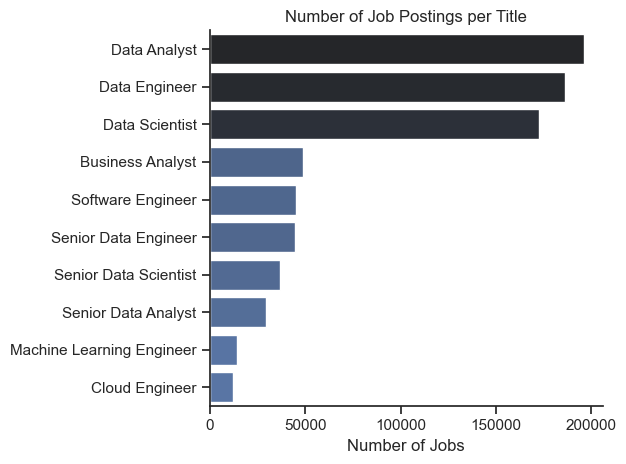

In [14]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Job Postings per Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Countries to Explore

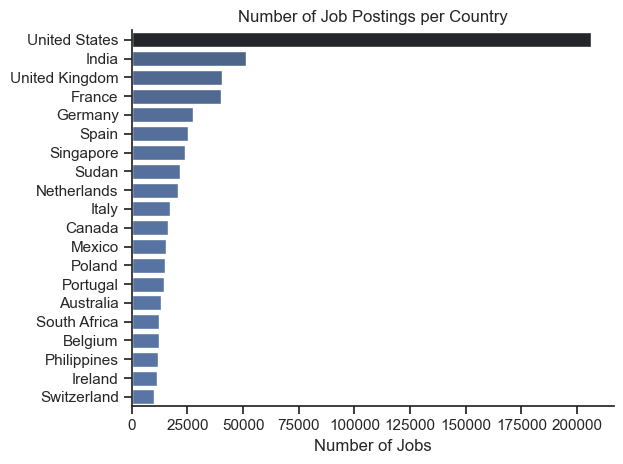

In [19]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_country', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Job Postings per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Companies to Explore

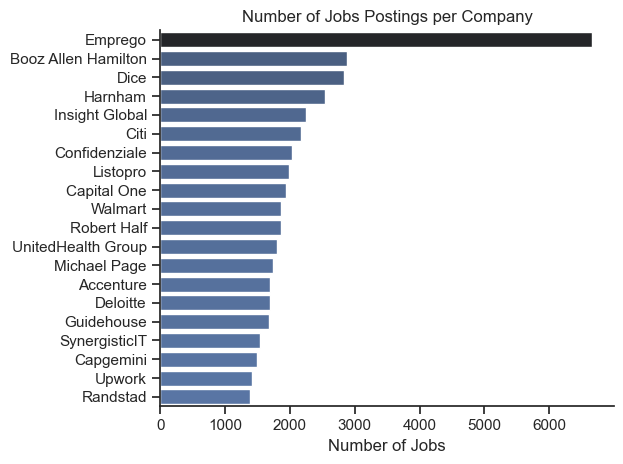

In [31]:
df_plot = df['company_name'].value_counts().head(20).to_frame()

sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Number of Jobs Postings per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()

plt.tight_layout()
plt.show()

### Job Opportunities

In [106]:
df['job_degree_mention'] = ~df['job_no_degree_mention']

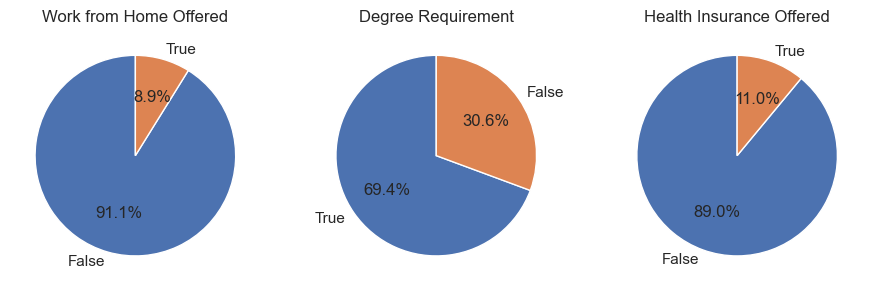

In [109]:

fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels = df[column].value_counts().index, autopct='%1.1f%%' , startangle = 90)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Analysts in the US

### Filter for Data Analyst Jobs in the US

In [72]:
df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

job_no_degree_mention
False    544965
True     240776
Name: count, dtype: int64